# Домашнее задание: Анализ временного ряда на примере пассажиропотока

задание №: 3  
исполнитель: Маъруф Ибрагимов

## 1. 📊 Загрузка данных и первичный анализ  
- **Загрузите** предоставленный датасет.
- **Постройте график** зависимости переменной `passengers` от времени.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = (
    pd.read_csv('passengers.csv', header = 0, names = ['date', 'passenger_cnt'])
    .assign(
        date = lambda d_: pd.to_datetime(d_['date']+'-01'),
        month_id = lambda d_: d_['date'].dt.month,
        quarter_id = lambda d_: d_['date'].dt.quarter,
        year = lambda d_: d_['date'].dt.year
    )
)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           144 non-null    datetime64[ns]
 1   passenger_cnt  144 non-null    int64         
 2   month_id       144 non-null    int32         
 3   quarter_id     144 non-null    int32         
 4   year           144 non-null    int32         
dtypes: datetime64[ns](1), int32(3), int64(1)
memory usage: 4.1 KB


In [4]:
df.head()

,date,passenger_cnt,month_id,quarter_id,year
0,1949-01-01,112,1,1,1949
1,1949-02-01,118,2,1,1949
2,1949-03-01,132,3,1,1949
3,1949-04-01,129,4,2,1949
4,1949-05-01,121,5,2,1949


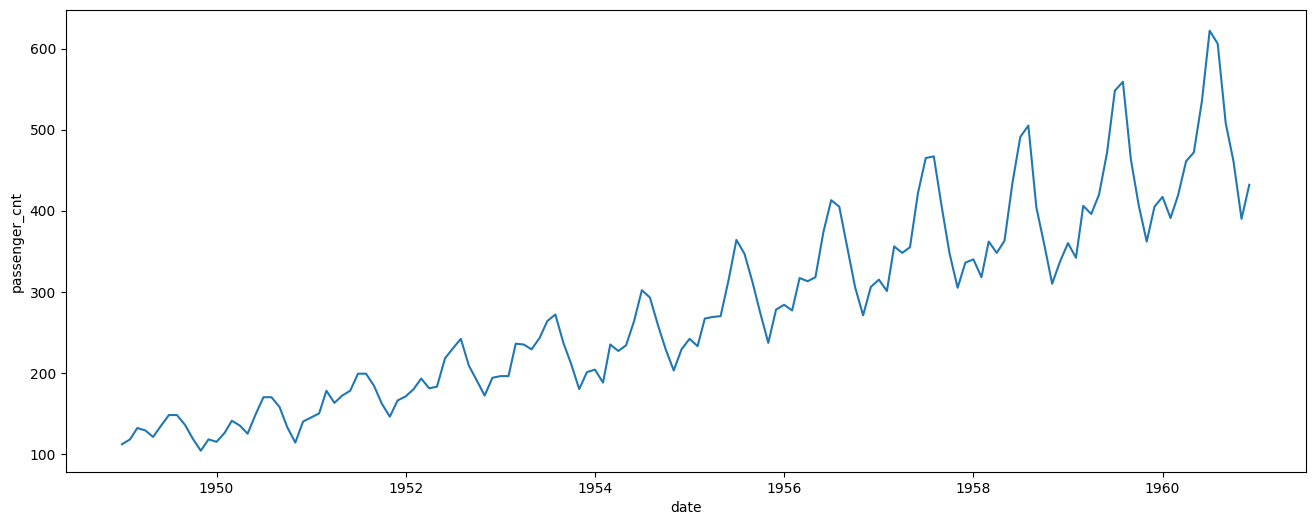

In [5]:
fig = plt.figure(figsize = (16, 6))
sns.lineplot(
    data = df,
    x = 'date',
    y = 'passenger_cnt'
)
plt.show();

## 2. 📈 Первоначальные выводы о тренде и сезонности  
- **Определите наличие тренда** и сезонности.
- **Попробуйте объяснить причины** их наличия.

> В графике прослеживается наличие восходящего тренда и годовая сезоннность.  
> Вероятные причины - тенденция роста пассажиропотока и зависимость от времени года

## 3. 📉 Сглаживание шума  
- **Оцените наличие сезонности** на основе сглаженного ряда.

In [6]:
df['ema_6'] = df['passenger_cnt'].ewm(6).mean()
df['ema_12'] = df['passenger_cnt'].ewm(12).mean()

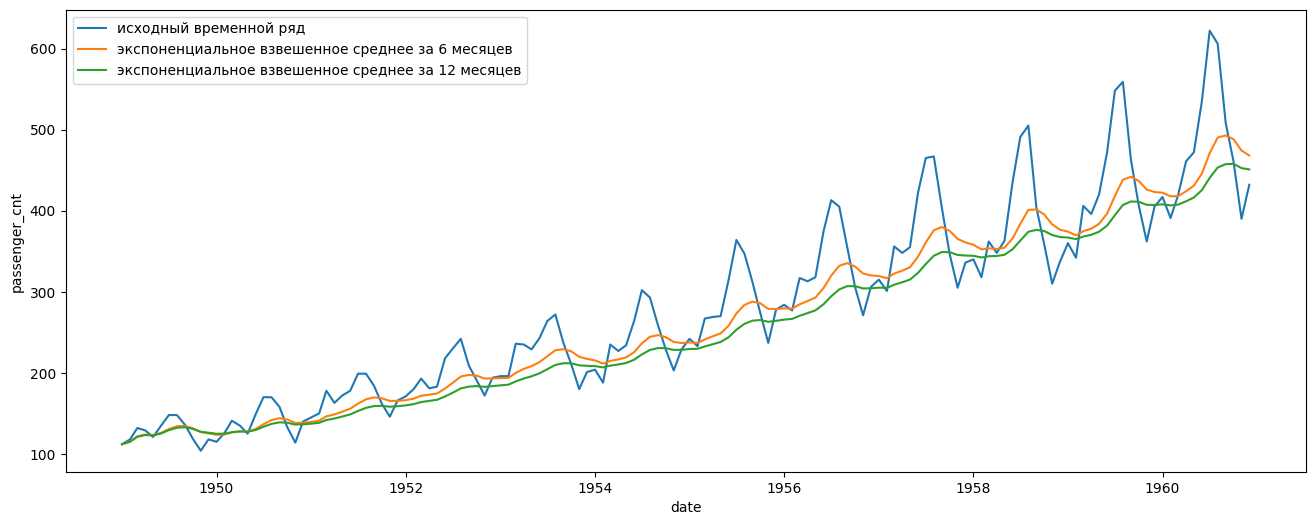

In [7]:
fig = plt.figure(figsize = (16, 6))
sns.lineplot(data = df, x = 'date', y = 'passenger_cnt', label = 'исходный временной ряд')
sns.lineplot(data = df, x = 'date', y = 'ema_6', label = 'экспоненциальное взвешенное среднее за 6 месяцев')
sns.lineplot(data = df, x = 'date', y = 'ema_12', label = 'экспоненциальное взвешенное среднее за 12 месяцев')
plt.show();

## 4. 📆 Анализ сезонности на разных временных интервалах
- **Создайте сводные таблицы** (`pivot_table`) для анализа сезонности:
  - По месяцам
  - По кварталам
  - По годам
- **Постройте графики** для каждого из временных интервалов.

In [8]:
monthly_pivot = df.pivot_table(
    index = 'month_id',
    columns = 'year',
    values = 'passenger_cnt',
    aggfunc = 'sum'
)

In [9]:
quarterly_pivot = df.pivot_table(
    index = 'quarter_id',
    columns = 'year',
    values = 'passenger_cnt',
    aggfunc = 'sum'
)

In [10]:
yearly_pivot = df.pivot_table(
    index = 'year',
    columns = 'month_id',
    values = 'passenger_cnt',
    aggfunc = 'sum'
)

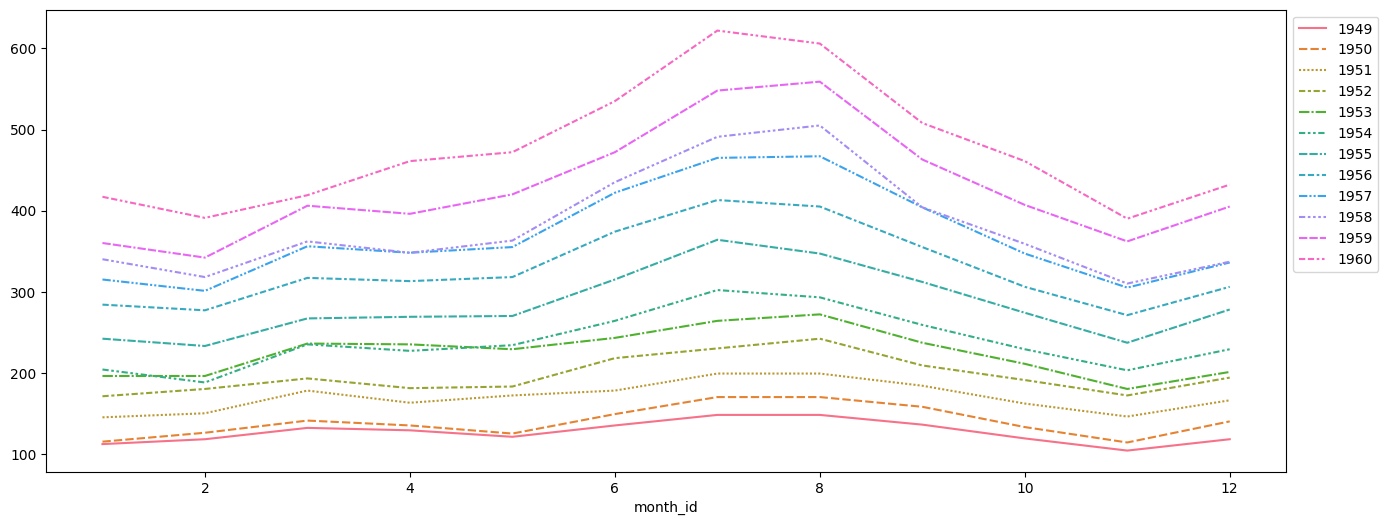

In [11]:
fig = plt.figure(figsize = (16, 6))
sns.lineplot(monthly_pivot)
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.show();

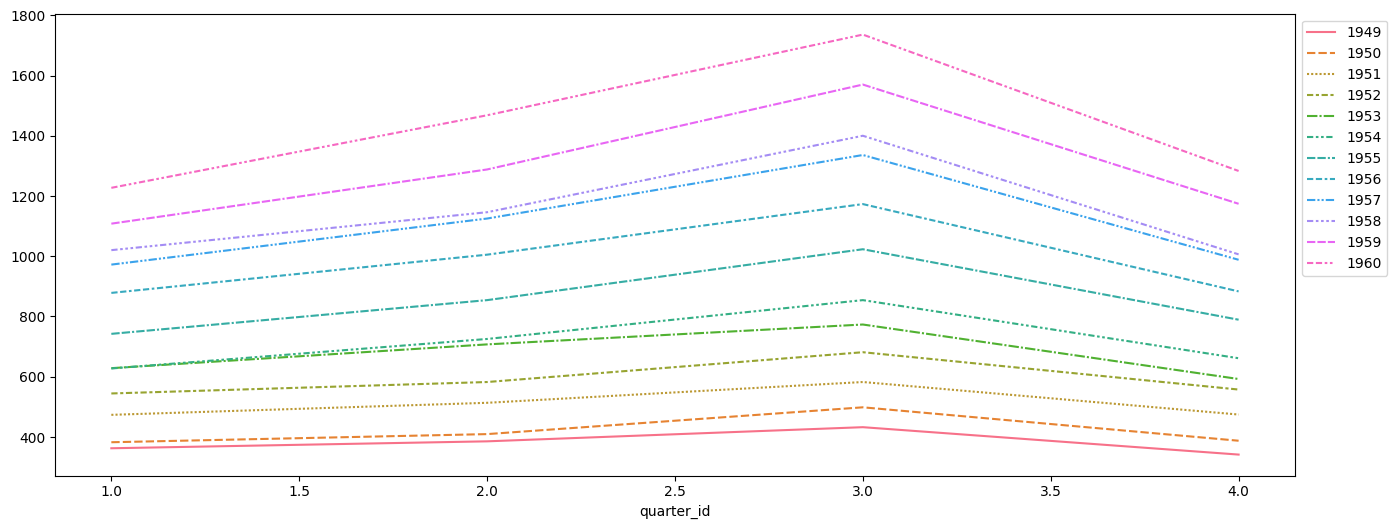

In [12]:
fig = plt.figure(figsize = (16, 6))
sns.lineplot(quarterly_pivot)
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.show();

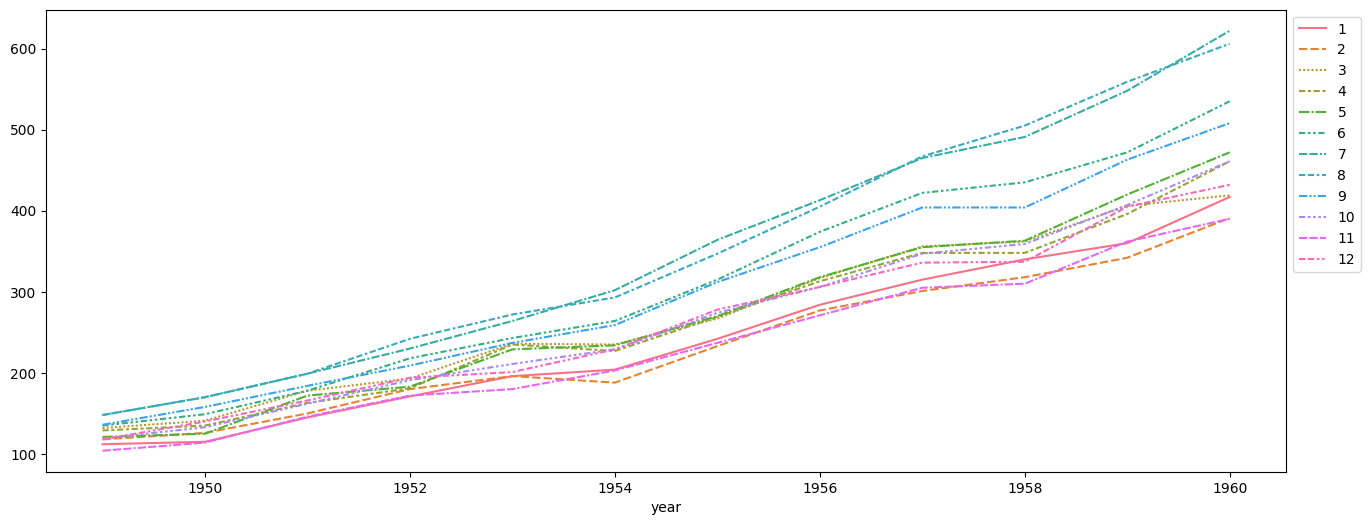

In [13]:
fig = plt.figure(figsize = (16, 6))
sns.lineplot(yearly_pivot)
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.show();

## 5. 🔄 Анализ тренда с использованием скользящих средних
- **Проверьте наличие тренда** с помощью скользящих средних для различных окон.
- **Постройте графики** и сделайте выводы.

In [14]:
df['rolling_mean_6'] = df['passenger_cnt'].rolling(window = 6).mean()
df['rolling_mean_12'] = df['passenger_cnt'].rolling(window = 12).mean()

In [15]:
df.head(20)

,date,passenger_cnt,month_id,quarter_id,year,ema_6,ema_12,rolling_mean_6,rolling_mean_12
0,1949-01-01,112,1,1,1949,112.000000,112.000000,NaN,NaN
1,1949-02-01,118,2,1,1949,115.230769,115.120000,NaN,NaN
2,1949-03-01,132,3,1,1949,121.700787,121.202559,NaN,NaN
3,1949-04-01,129,4,2,1949,123.966516,123.391821,NaN,NaN
4,1949-05-01,121,5,2,1949,123.177832,122.833988,NaN,NaN
5,1949-06-01,135,6,2,1949,125.976631,125.287863,124.500000,NaN
6,1949-07-01,148,7,3,1949,130.742993,129.360692,130.500000,NaN
7,1949-08-01,148,8,3,1949,134.221877,132.392687,135.500000,NaN
8,1949-09-01,136,9,3,1949,134.560448,132.933136,136.166667,NaN
9,1949-10-01,119,10,4,1949,131.732094,130.987498,134.500000,NaN


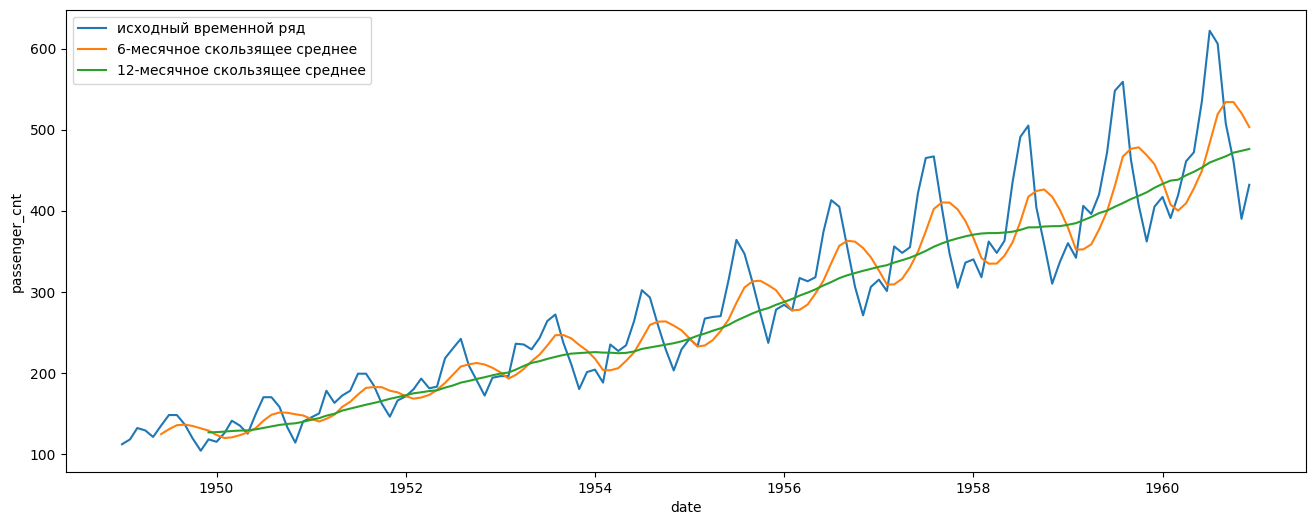

In [16]:
fig = plt.figure(figsize = (16, 6))
sns.lineplot(data = df, x = 'date', y = 'passenger_cnt', label = 'исходный временной ряд')
sns.lineplot(data =df, x = 'date', y = 'rolling_mean_6', label = '6-месячное скользящее среднее')
sns.lineplot(data =df, x = 'date', y = 'rolling_mean_12', label = '12-месячное скользящее среднее')
plt.show();

> 12-месячное скользящее среднее лучше описывает тренд, который имеет тенденцию роста.

## 6. 📉 Анализ шума
- **Постройте график шума** в данных.
- **Сравните его** с графиком белого шума.
- **Сделайте выводы** о природе шума в данных.

In [17]:
from random import gauss, seed

In [18]:
df['noise'] = (df['passenger_cnt'] - df['rolling_mean_12']).diff()
df

,date,passenger_cnt,month_id,quarter_id,year,ema_6,ema_12,rolling_mean_6,rolling_mean_12,noise
0,1949-01-01,112,1,1,1949,112.000000,112.000000,NaN,NaN,NaN
1,1949-02-01,118,2,1,1949,115.230769,115.120000,NaN,NaN,NaN
2,1949-03-01,132,3,1,1949,121.700787,121.202559,NaN,NaN,NaN
3,1949-04-01,129,4,2,1949,123.966516,123.391821,NaN,NaN,NaN
4,1949-05-01,121,5,2,1949,123.177832,122.833988,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
139,1960-08-01,606,8,3,1960,490.264766,453.270175,519.166667,463.333333,-19.916667
140,1960-09-01,508,9,3,1960,492.798371,457.480214,534.000000,467.083333,-101.750000
141,1960-10-01,461,10,4,1960,488.255746,457.750970,534.000000,471.583333,-51.500000
142,1960-11-01,390,11,4,1960,474.219211,452.539301,520.333333,473.916667,-73.333333


In [19]:
seed(1)
white_noise = [gauss(0.0, 1.0) for i in range(df.query("noise.notnull()").shape[0])]
white_noise = pd.Series(white_noise)

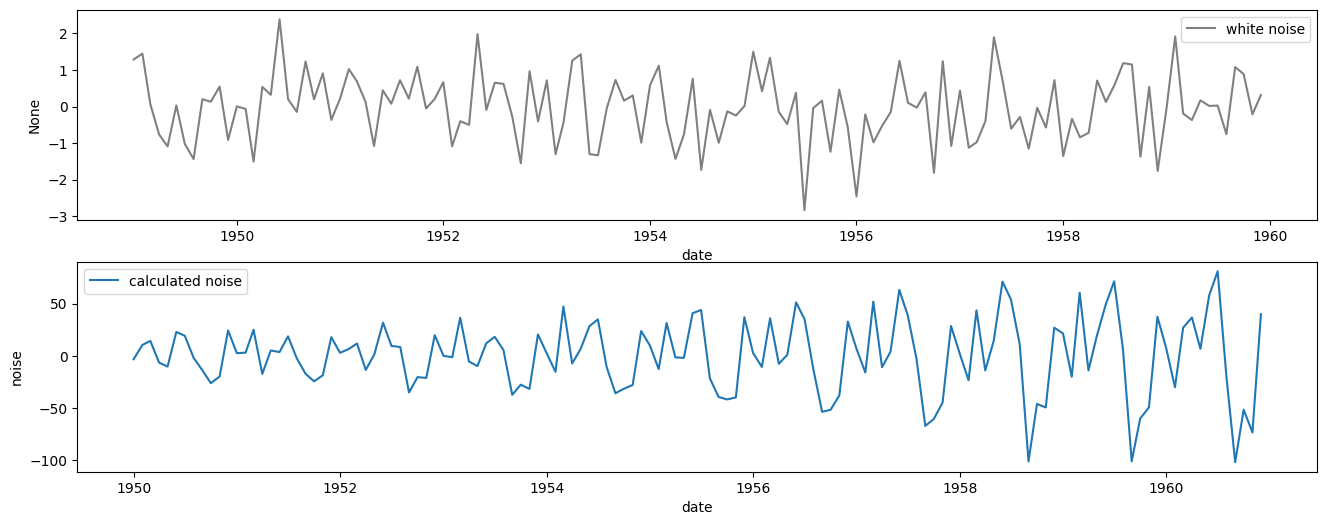

In [20]:
fig, axes = plt.subplots(2, 1, figsize = (16, 6))
sns.lineplot(x = df['date'], y = white_noise, label = 'white noise', color = 'grey', ax = axes[0])
sns.lineplot(x = df['date'], y = df['noise'], label = 'calculated noise', ax = axes[1])
plt.show();

> Анализ показывает поэтапное нарастание амплитуды шума

## 7. 🧩 Декомпозиция временного ряда
- **Разделите временной ряд** на тренд, сезонность и шум с помощью:
  - **Библиотеки `statsmodels`**
  - **Ручной декомпозиции**
- **Сравните результаты** двух способов.

In [21]:
import statsmodels.api as sm
import numpy as np

In [22]:
res = sm.tsa.seasonal_decompose(df['passenger_cnt'], model = 'additive', period = 6)

In [23]:
custom_trend = df['passenger_cnt'].rolling(12).mean()
detrend_ = df['passenger_cnt'] - custom_trend

In [24]:
def season_mean(x, period):
    """
    Return means for each period in x. period is an int that gives the
    number of periods per cycle. E.g., 12 for monthly. NaNs are ignored
    in the mean.
    """
    return np.array([np.nanmean(x[i::period], axis=0) for i in range(period)])

In [25]:
s_a = season_mean(detrend_, 6)
s_a -=np.mean(s_a, axis=0)

In [26]:
nobs = detrend_.shape[0]
custom_seasonal = np.tile(s_a.T, nobs // 6 + 1).T[:nobs]

In [27]:
custom_residuals = detrend_ - custom_seasonal

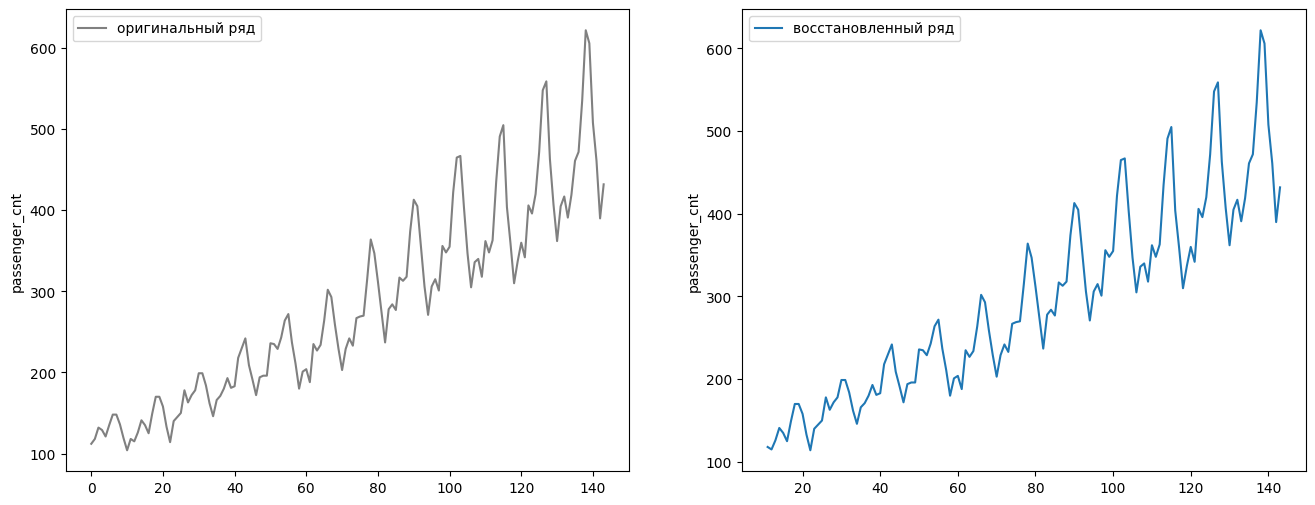

In [28]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
sns.lineplot(df['passenger_cnt'], ax = axes[0], color = 'grey', label = 'оригинальный ряд')
sns.lineplot(custom_trend + custom_seasonal + custom_residuals, ax = axes[1], label = 'восстановленный ряд')
plt.show();

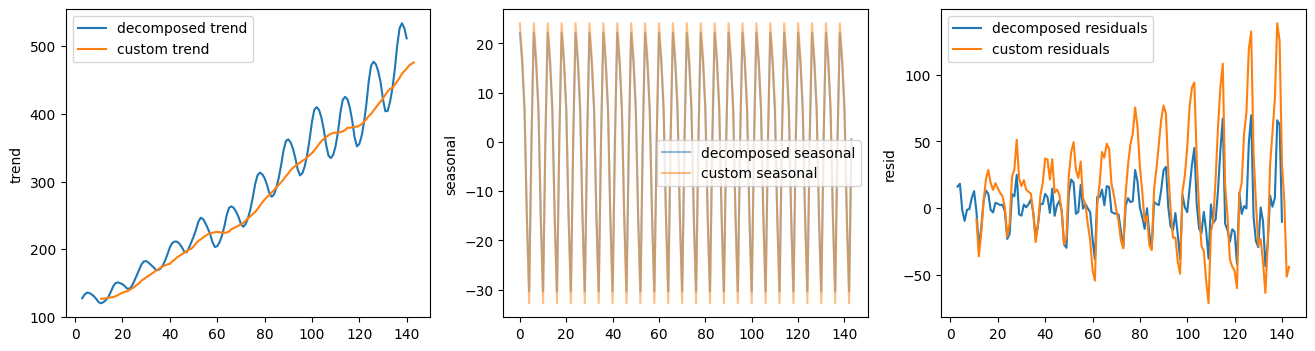

In [29]:
fig, axes = plt.subplots(1, 3, figsize = (16, 4))
sns.lineplot(res.trend, label = 'decomposed trend', ax = axes[0])
sns.lineplot(custom_trend, label = 'custom trend', ax = axes[0])
sns.lineplot(res.seasonal, label = 'decomposed seasonal', ax = axes[1], alpha=.5)
sns.lineplot(custom_seasonal, label = 'custom seasonal', ax = axes[1], alpha=.5)
sns.lineplot(res.resid, label = 'decomposed residuals', ax = axes[2])
sns.lineplot(custom_residuals, label = 'custom residuals', ax = axes[2])
plt.show();

## 8. 📉 Построение графика автокорреляции
- **Постройте график автокорреляции** для разных лагов.
- **Сделайте выводы** о наличии сезонности на основе графика

In [30]:
from statsmodels.graphics.tsaplots import plot_acf

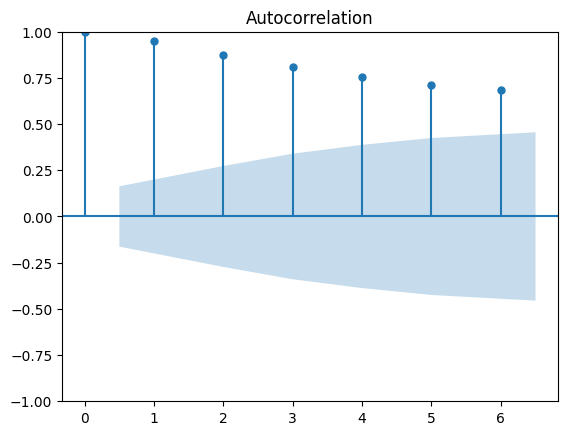

In [36]:
plot_acf(df['passenger_cnt'], lags = 6);

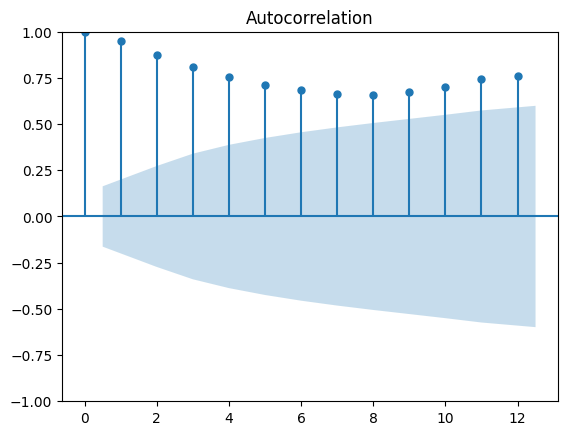

In [37]:
plot_acf(df['passenger_cnt'], lags = 12);

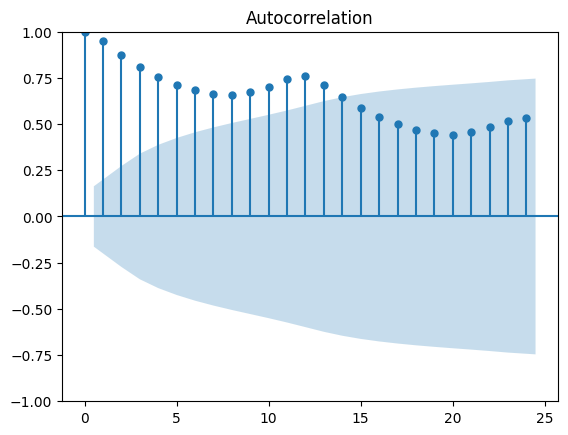

In [38]:
plot_acf(df['passenger_cnt'], lags = 24);

> Автокорреляционный анализ показывает наличие сезонности в данных